In [411]:
import nptsne
from nptsne import hsne_analysis
from pathlib import Path
import numpy as np
import community as community_louvain
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
from matplotlib.lines import Line2D
import pandas as pd
from tqdm import tqdm
from sklearn.utils import check_random_state, check_array
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA


# fashionTrain = pd.read_csv('data/fashion-train.csv')

# fashionX = fashionTrain.values[:,2:]
# fashionY = fashionTrain.values[:, 1].astype(int)

# print(fashionX.shape, fashionY.shape)

# X = fashionX
# X = normalize(X)
# lab = fashionY.astype(int)




X = np.load('./data/MNIST_70000.npy')
lab = np.load('./data/MNIST_70000_label.npy').astype(int)
X = normalize(X)


# data = pd.read_csv('data/mnist_max_pooling2d_dense.data', header=None)
# data = data.drop(columns=[0])
# X = data.values[:, :-1]
# lab = data.values[:, -1]


# X = np.loadtxt("data/mammals-20000_features.txt")
# lab = np.loadtxt("data/mammals-20000_classes.txt")



# data = pd.read_csv('data/gene_expression.csv')
# X = data.values[:, :-1]
# lab = data.values[:, -1]
# X = np.log(X+1)
# # X = normalize(X)
# X = PCA(n_components=100).fit_transform(X)






X = check_array(X, dtype=np.float32, accept_sparse="csr", order="C")
dataset = 'fashion'
print('Size data:', X.shape)

Size data: (70000, 784)


In [412]:
hsne = nptsne.HSne(True)
# Create a 3 scale HSNE analysis from the MNIST data
hsne.create_hsne(X, 4)
# print(hsne.get_scale(0).num_points, hsne.get_scale(1).num_points)
print(hsne.get_scale(0).num_points, hsne.get_scale(1).num_points, hsne.get_scale(2).num_points, hsne.get_scale(3).num_points)


70000 14505 2723 450


In [413]:
container = hsne_analysis.AnalysisModel(hsne, hsne_analysis.EmbedderType.CPU)

In [414]:
analysis_level3 = container.top_analysis
len(analysis_level3.landmark_orig_indexes)

450

In [415]:
for i in tqdm(range(500)):
    analysis_level3.do_iteration()

100%|██████████| 500/500 [00:01<00:00, 372.99it/s]


In [416]:
y_analysis_level3 = lab[analysis_level3.landmark_orig_indexes]

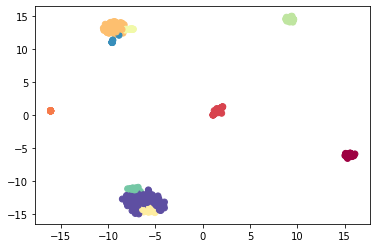

In [417]:
plt.scatter(analysis_level3.embedding[:, 0], analysis_level3.embedding[:, 1], 
            c = y_analysis_level3, cmap='Spectral')
plt.savefig('figs/'+dataset+'-hsne-level3.png')

In [418]:
analysis_level2 = container.add_new_analysis(analysis_level3, np.arange(len(y_analysis_level3)))
len(analysis_level2.landmark_orig_indexes)

2723

In [419]:
for i in tqdm(range(500)):
    analysis_level2.do_iteration()

100%|██████████| 500/500 [00:09<00:00, 51.27it/s]


In [420]:
y_analysis_level2 = lab[analysis_level2.landmark_orig_indexes]
len(y_analysis_level2)

2723

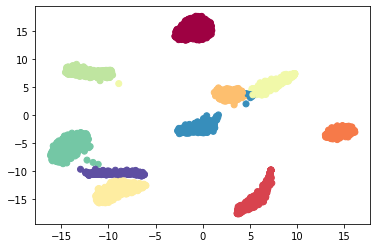

In [421]:
plt.scatter(analysis_level2.embedding[:, 0], analysis_level2.embedding[:, 1], 
            c = y_analysis_level2, cmap='Spectral')
plt.savefig('figs/'+dataset+'-hsne-level2.png')
# inds = y_analysis_level2 == 2
# plt.scatter(analysis_level2.embedding[inds, 0], analysis_level2.embedding[inds, 1], 
#             c = 'black', s=10)
# plt.savefig("hsne_level2.svg")
# plt.show()

In [422]:
analysis_level1 = container.add_new_analysis(analysis_level2, np.arange(len(y_analysis_level2)))
len(analysis_level1.landmark_orig_indexes)

14505

In [423]:
for i in tqdm(range(500)):
    analysis_level1.do_iteration()

100%|██████████| 500/500 [00:25<00:00, 19.79it/s]


In [424]:
y_analysis_level1 = lab[analysis_level1.landmark_orig_indexes]
len(y_analysis_level1)

14505

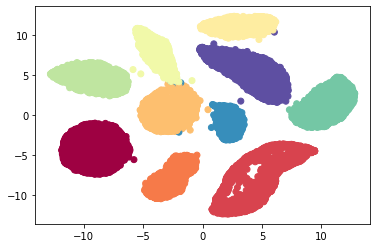

In [425]:
plt.scatter(analysis_level1.embedding[:, 0], analysis_level1.embedding[:, 1], 
            c = y_analysis_level1, cmap='Spectral')
plt.savefig("figs/"+dataset+"-hsne-level1.png")

In [426]:
analysis_level0 = container.add_new_analysis(analysis_level1, np.arange(len(y_analysis_level1)))
len(analysis_level0.landmark_orig_indexes)

70000

In [427]:
for i in tqdm(range(500)):
    analysis_level0.do_iteration()

100%|██████████| 500/500 [02:02<00:00,  4.08it/s]


In [428]:
y_analysis_level0 = lab[analysis_level0.landmark_orig_indexes]
y_analysis_level0

array([0, 0, 0, ..., 9, 9, 9])

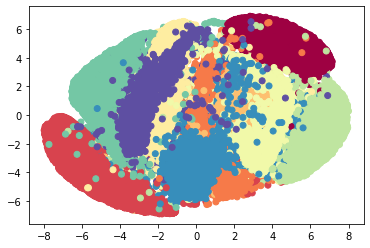

In [429]:
plt.scatter(analysis_level0.embedding[:, 0], analysis_level0.embedding[:, 1], c = y_analysis_level0, 
            cmap='Spectral')
plt.savefig("figs/"+dataset+"-hsne-level0.png")
# plt.savefig("hsne_level0.svg")
# plt.show()

In [430]:
indices = []
for i in range(len(y_analysis_level3)):
    if y_analysis_level3[i] in [1]:
        indices.append(i)


analysis_cluster1 = container.add_new_analysis(analysis_level3, np.array(indices))
# len(analysis_cluster.landmark_orig_indexes), analysis_cluster.landmark_orig_indexes

In [431]:
for i in tqdm(range(500)):
    analysis_cluster1.do_iteration()

100%|██████████| 500/500 [00:01<00:00, 486.54it/s]


In [432]:
y_analysis_cluster1 = lab[analysis_cluster1.landmark_orig_indexes]
len(y_analysis_cluster1)

351

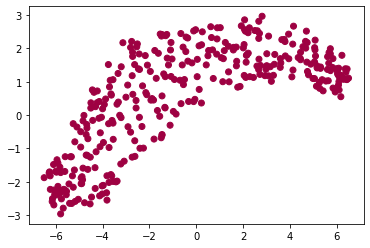

In [433]:
plt.scatter(analysis_cluster1.embedding[:, 0], analysis_cluster1.embedding[:, 1],
            c = y_analysis_cluster1, cmap='Spectral')
plt.savefig("figs/"+dataset+"-hsne-expand1.png")

In [434]:
# indices = []
# for i in range(len(y_analysis_level2)):
#     if y_analysis_level2[i] in [5,7,9]:
#         indices.append(i)


analysis_cluster = container.add_new_analysis(analysis_cluster1, np.arange(len(y_analysis_cluster1)))
# len(analysis_cluster.landmark_orig_indexes), analysis_cluster.landmark_orig_indexes

In [435]:
for i in tqdm(range(500)):
    analysis_cluster.do_iteration()

100%|██████████| 500/500 [00:15<00:00, 32.83it/s]


In [436]:
y_analysis_cluster = lab[analysis_cluster.landmark_orig_indexes]
len(y_analysis_cluster)

2029

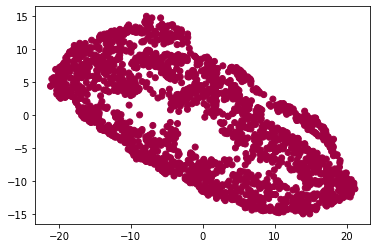

In [437]:
plt.scatter(analysis_cluster.embedding[:, 0], analysis_cluster.embedding[:, 1],
            c = y_analysis_cluster, cmap='Spectral')
plt.savefig("figs/"+dataset+"-hsne-expand2.png")

In [438]:
# indices = []
# for i in range(len(y_analysis_level1)):
#     if y_analysis_level1[i] in [5,7,9]:
#         indices.append(i)


analysis_cluster0 = container.add_new_analysis(analysis_cluster, np.arange(len(y_analysis_cluster)))#np.array(indices))


In [439]:
for i in tqdm(range(500)):
    analysis_cluster0.do_iteration()

100%|██████████| 500/500 [00:16<00:00, 29.44it/s]


In [440]:
y_analysis_cluster0 = lab[analysis_cluster0.landmark_orig_indexes]

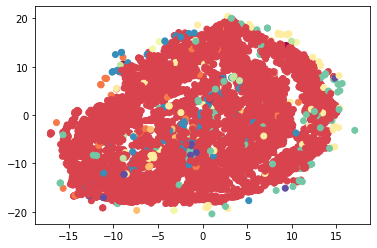

In [441]:
plt.scatter(analysis_cluster0.embedding[:, 0], analysis_cluster0.embedding[:, 1], 
            c = y_analysis_cluster0, cmap='Spectral')
plt.savefig("figs/"+dataset+"-hsne-expand3.png")

In [442]:
import demap
import random
import math
from sklearn.metrics import euclidean_distances

from sklearn.neighbors import NearestNeighbors

from scipy.stats import pearsonr

def correlation(X, X_emb):
    
    high = []
    emb = []
    
    for i in range(X.shape[0]):
        for j in range(i+1, X.shape[0]):
            high.append(np.linalg.norm(X[i]-X[j]))
            emb.append(np.linalg.norm(X_emb[i]-X_emb[j]))
    
    high = np.array(high)
    emb = np.array(emb)
    
    return pearsonr(high, emb)[0]

def stress(X, X_emb):
    
#     num = 0.0
#     den = 0.0
    
#     for i in range(X.shape[0]):
#         for j in range(X.shape[0]):
#             num += (np.linalg.norm(X[i]-X[j]) - np.linalg.norm(X_emb[i]-X_emb[j]))**2
            
#             den += np.linalg.norm(X_emb[i]-X_emb[j])**2
            
#     return math.sqrt(num/den)
    
    
    
    DE = euclidean_distances(X_emb)
    DE = DE/np.max(DE)
    DH = euclidean_distances(X)
    DH = DH/np.max(DH)
    stress = 0.5 * np.sum((DE - DH)**2)
    
    return np.sqrt(stress/(0.5*np.sum(DH**2)))
    

    

def NNP(X, X_emb, Khigh=30):
    neigh_high = NearestNeighbors(n_neighbors=Khigh, n_jobs=-1)
    neigh_high.fit(X)
    high_dists, high_indices = neigh_high.kneighbors(X)


    neigh_emb = NearestNeighbors(n_neighbors=Khigh, n_jobs=-1)
    neigh_emb.fit(X_emb)
    emb_dists, emb_indices = neigh_emb.kneighbors(X_emb)

    m_precision = np.zeros(Khigh)
    m_recall = np.zeros(Khigh)
    
    for i in tqdm(range(X.shape[0])):
        high_current = high_indices[i][1:]
        for k in range(1, Khigh+1):
            emb_current = emb_indices[i][1:k+1]            
            
            tp = len(np.intersect1d(high_current, emb_current))
            
            precision_val = float(tp)/k
            recall_val = float(tp)/Khigh
            
            m_precision[k-1] += precision_val
            m_recall[k-1] += recall_val
    
    m_precision = m_precision/float(X.shape[0])
    m_recall = m_recall/float(X.shape[0])
    
            
    return m_precision, m_recall


def neighborhood_preservation(X, X_emb, Khigh=30):
    
    neigh_high = NearestNeighbors(n_neighbors=Khigh+1, n_jobs=-1)
    neigh_high.fit(X)
    high_dists, high_indices = neigh_high.kneighbors(X)


    neigh_emb = NearestNeighbors(n_neighbors=Khigh+1, n_jobs=-1)
    neigh_emb.fit(X_emb)
    emb_dists, emb_indices = neigh_emb.kneighbors(X_emb)

    npres = np.zeros(Khigh)
    
    for k in range(1, Khigh+1):
        for i in range(X.shape[0]):
            high_current = high_indices[i][1:k+1]
            emb_current = emb_indices[i][1:k+1]
            
            tp = len(np.intersect1d(high_current, emb_current))
            
            npres[k-1] += (tp/k)
        
        
    npres /= float(X.shape[0])
    
    return npres
    
    


stress:  0.47898667302706127


/home/wilson/anaconda3/envs/py37/lib/python3.7/site-packages/graphtools/graphs.py:121: UserWarning: Building a kNNGraph on data of shape (450, 784) is expensive. Consider setting n_pca.
  UserWarning,


demap:  0.3647228778323838
pearsonr:  0.3692687277575155
[0.3044     0.3556     0.39       0.4081     0.4192     0.42443333
 0.42925714 0.4359     0.43871111 0.4408     0.44285455 0.44368333
 0.44461538 0.44604286 0.44676    0.4479     0.44742353 0.44798889
 0.44937895 0.45047    0.45111429 0.4523     0.4525913  0.45393333
 0.454912   0.45526923 0.4558963  0.45599286 0.45655862 0.45722   ]


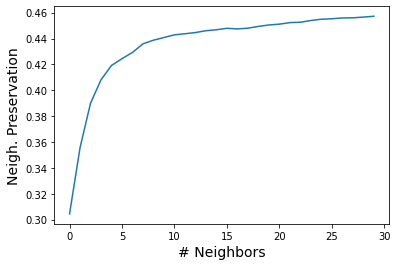

In [443]:
fourth_level = X[analysis_level3.landmark_orig_indexes,:]
fourth_embedding = analysis_level3.embedding

indices_4 = random.sample(range(0, len(fourth_embedding)), min(3000, len(fourth_embedding)))

fourth_embedding = fourth_embedding[indices_4]
fourth_level = fourth_level[indices_4]



noise = np.random.normal(0, .1, fourth_level.shape)
print("stress: ", stress(fourth_level, fourth_embedding))
print("demap: ", demap.DEMaP(fourth_level, fourth_embedding))
print("pearsonr: ", correlation(fourth_level, fourth_embedding))


ks = 30

npres = neighborhood_preservation(cluster_level, cluster_embedding, Khigh=ks)
print(npres)
plt.plot(np.arange(ks), npres)
plt.xlabel("# Neighbors", fontsize=14)
plt.ylabel("Neigh. Preservation", fontsize=14)
plt.savefig("figs/"+dataset+"-hsne-level3-np.png")
plt.show()

stress:  0.45816270126795267


/home/wilson/anaconda3/envs/py37/lib/python3.7/site-packages/graphtools/graphs.py:121: UserWarning: Building a kNNGraph on data of shape (2723, 784) is expensive. Consider setting n_pca.
  UserWarning,


demap:  0.5778095832946046
pearsonr:  0.4944226550022261
[0.10539846 0.16672787 0.21349002 0.25137716 0.28145428 0.30707553
 0.33193432 0.35411311 0.37572938 0.39456482 0.41147798 0.42701065
 0.44218763 0.45682283 0.46958012 0.48108704 0.49350846 0.50554943
 0.51553047 0.52488065 0.53512408 0.54413581 0.55166137 0.55825376
 0.56634594 0.57399927 0.57965751 0.5861576  0.59307052 0.59870241]


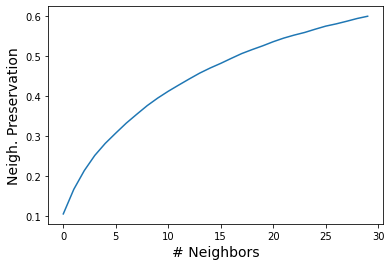

In [444]:

third_level = X[analysis_level2.landmark_orig_indexes,:]
third_embedding = analysis_level2.embedding

indices_3 = random.sample(range(0, len(third_embedding)), min(3000, len(third_embedding)))

third_embedding = third_embedding[indices_3]
third_level = third_level[indices_3]


noise = np.random.normal(0, .1, third_level.shape)
print("stress: ", stress(third_level, third_embedding))
print("demap: ", demap.DEMaP(third_level, third_embedding))
print("pearsonr: ", correlation(third_level, third_embedding))


ks = 30

npres = neighborhood_preservation(third_level, third_embedding, Khigh=ks)
print(npres)
plt.plot(np.arange(ks), npres)
plt.xlabel("# Neighbors", fontsize=14)
plt.ylabel("Neigh. Preservation", fontsize=14)
plt.savefig("figs/"+dataset+"-hsne-level2-np.png")
plt.show()

stress:  0.463616402633843


/home/wilson/anaconda3/envs/py37/lib/python3.7/site-packages/graphtools/graphs.py:121: UserWarning: Building a kNNGraph on data of shape (3000, 784) is expensive. Consider setting n_pca.
  UserWarning,


demap:  0.6229375568760847
pearsonr:  0.5745534075719556
[0.12533333 0.18483333 0.23       0.26558333 0.29353333 0.31911111
 0.34314286 0.36354167 0.38166667 0.39626667 0.412      0.42519444
 0.43961538 0.45040476 0.46066667 0.47125    0.48186275 0.49083333
 0.49919298 0.50795    0.51530159 0.5235     0.52986957 0.53620833
 0.54305333 0.54951282 0.55582716 0.56184524 0.56673563 0.57246667]


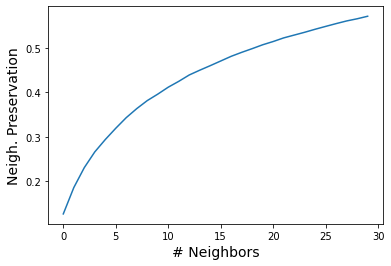

In [445]:

second_level = X[analysis_level1.landmark_orig_indexes,:]
second_embedding = analysis_level1.embedding


indices_2 = random.sample(range(0, len(second_embedding)), min(3000, len(second_embedding)))

second_embedding = second_embedding[indices_2]
second_level = second_level[indices_2]


print("stress: ", stress(second_level, second_embedding))
print("demap: ", demap.DEMaP(second_level, second_embedding))
print("pearsonr: ", correlation(second_level, second_embedding))


npres = neighborhood_preservation(second_level, second_embedding, Khigh=ks)
print(npres)
plt.plot(np.arange(ks), npres)
plt.xlabel("# Neighbors", fontsize=14)
plt.ylabel("Neigh. Preservation", fontsize=14)
plt.savefig("figs/"+dataset+"-hsne-level1-np.png")
plt.show()

stress:  0.5336367073515634


/home/wilson/anaconda3/envs/py37/lib/python3.7/site-packages/graphtools/graphs.py:121: UserWarning: Building a kNNGraph on data of shape (3000, 784) is expensive. Consider setting n_pca.
  UserWarning,


demap:  0.5230320723719685
pearsonr:  0.45215847579725654
[0.09166667 0.12166667 0.14911111 0.17075    0.18853333 0.20422222
 0.21890476 0.2305     0.24159259 0.25223333 0.26148485 0.27
 0.27774359 0.28435714 0.2902     0.29733333 0.3047451  0.31038889
 0.31552632 0.32153333 0.32674603 0.33213636 0.33721739 0.34129167
 0.34621333 0.35091026 0.35471605 0.35804762 0.36186207 0.36484444]


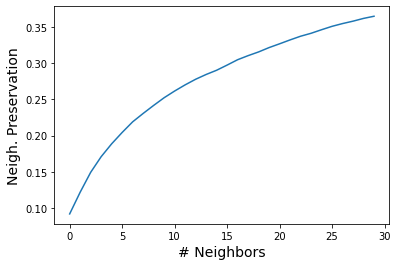

In [446]:

first_level = X[analysis_level0.landmark_orig_indexes,:]
first_embedding = analysis_level0.embedding


indices_1 = random.sample(range(0, len(first_embedding)), min(3000, len(first_embedding)))

first_embedding = first_embedding[indices_1]
first_level = first_level[indices_1]

print("stress: ", stress(first_level, first_embedding))
print("demap: ", demap.DEMaP(first_level, first_embedding))
print("pearsonr: ", correlation(first_level, first_embedding))

npres = neighborhood_preservation(first_level, first_embedding, Khigh=ks)
print(npres)
plt.plot(np.arange(ks), npres)
plt.xlabel("# Neighbors", fontsize=14)
plt.ylabel("Neigh. Preservation", fontsize=14)
plt.savefig("figs/"+dataset+"-hsne-level0-np.png")
plt.show()

stress:  0.4272521899759887


/home/wilson/anaconda3/envs/py37/lib/python3.7/site-packages/graphtools/graphs.py:121: UserWarning: Building a kNNGraph on data of shape (351, 784) is expensive. Consider setting n_pca.
  UserWarning,


demap:  0.9705919908786474
pearsonr:  0.9263319486458178
[0.1994302  0.27635328 0.34567901 0.39458689 0.42507123 0.44871795
 0.46805047 0.49038462 0.50807217 0.52706553 0.54415954 0.55887939
 0.57089634 0.58424908 0.59696106 0.61182336 0.62074744 0.63026274
 0.63682711 0.64558405 0.65418532 0.65928516 0.6665428  0.6741453
 0.68045584 0.68726715 0.69410151 0.70095645 0.70733864 0.71585945]


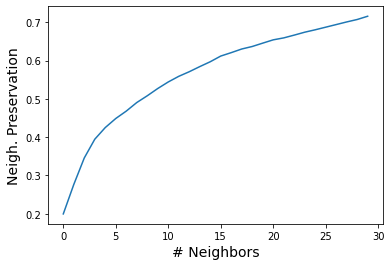

In [447]:
cluster_level = X[analysis_cluster1.landmark_orig_indexes,:]
cluster_embedding = analysis_cluster1.embedding

indices_cluster = random.sample(range(0, len(cluster_embedding)), min(5000, len(cluster_embedding)))

cluster_embedding = cluster_embedding[indices_cluster]
cluster_level = cluster_level[indices_cluster]

print("stress: ", stress(cluster_level, cluster_embedding))
print("demap: ", demap.DEMaP(cluster_level, cluster_embedding))
print("pearsonr: ", correlation(cluster_level, cluster_embedding))

ks = 30

npres = neighborhood_preservation(cluster_level, cluster_embedding, Khigh=ks)
print(npres)
plt.plot(np.arange(ks), npres)
plt.xlabel("# Neighbors", fontsize=14)
plt.ylabel("Neigh. Preservation", fontsize=14)
plt.savefig("figs/"+dataset+"-hsne-expand1-np.png")
plt.show()

stress:  0.39880449237650295


/home/wilson/anaconda3/envs/py37/lib/python3.7/site-packages/graphtools/graphs.py:121: UserWarning: Building a kNNGraph on data of shape (2029, 784) is expensive. Consider setting n_pca.
  UserWarning,


demap:  0.9603414372365364
pearsonr:  0.9203944189660043
[0.19566289 0.28758009 0.35058321 0.39440611 0.42621981 0.45564317
 0.47525171 0.49125185 0.50616067 0.52015771 0.53192347 0.54090685
 0.55044167 0.55769908 0.56504025 0.57238788 0.57869713 0.58370297
 0.58997173 0.59519468 0.60130489 0.6066132  0.61169563 0.61534828
 0.61868901 0.62355461 0.6259241  0.63023657 0.63363981 0.63712831]


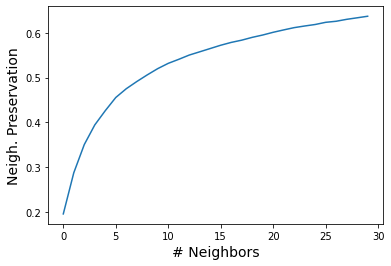

In [448]:
cluster_level = X[analysis_cluster.landmark_orig_indexes,:]
cluster_embedding = analysis_cluster.embedding

indices_cluster = random.sample(range(0, len(cluster_embedding)), min(5000, len(cluster_embedding)))

cluster_embedding = cluster_embedding[indices_cluster]
cluster_level = cluster_level[indices_cluster]

print("stress: ", stress(cluster_level, cluster_embedding))
print("demap: ", demap.DEMaP(cluster_level, cluster_embedding))
print("pearsonr: ", correlation(cluster_level, cluster_embedding))

ks = 30

npres = neighborhood_preservation(cluster_level, cluster_embedding, Khigh=ks)
print(npres)
plt.plot(np.arange(ks), npres)
plt.xlabel("# Neighbors", fontsize=14)
plt.ylabel("Neigh. Preservation", fontsize=14)
plt.savefig("figs/"+dataset+"-hsne-expand2-np.png")
plt.show()

stress:  0.4486375649824804


/home/wilson/anaconda3/envs/py37/lib/python3.7/site-packages/graphtools/graphs.py:121: UserWarning: Building a kNNGraph on data of shape (5000, 784) is expensive. Consider setting n_pca.
  UserWarning,


demap:  0.8240729025262158
pearsonr:  0.7830675168468906
[0.2142     0.2735     0.30906667 0.33535    0.34964    0.36456667
 0.37471429 0.382425   0.39164444 0.39658    0.40163636 0.40625
 0.40984615 0.41307143 0.41569333 0.4182625  0.42048235 0.42245556
 0.42467368 0.42658    0.42805714 0.43002727 0.43150435 0.43296667
 0.434408   0.43666923 0.43784444 0.43956429 0.44106207 0.44220667]


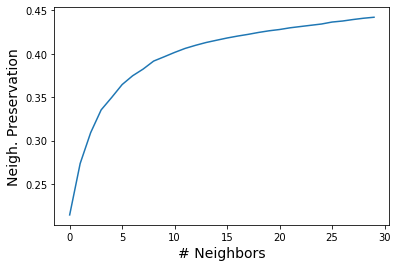

In [449]:
cluster_level = X[analysis_cluster0.landmark_orig_indexes,:]
cluster_embedding = analysis_cluster0.embedding

indices_cluster = random.sample(range(0, len(cluster_embedding)), min(5000, len(cluster_embedding)))

cluster_embedding = cluster_embedding[indices_cluster]
cluster_level = cluster_level[indices_cluster]

print("stress: ", stress(cluster_level, cluster_embedding))
print("demap: ", demap.DEMaP(cluster_level, cluster_embedding))
print("pearsonr: ", correlation(cluster_level, cluster_embedding))

ks = 30

npres = neighborhood_preservation(cluster_level, cluster_embedding, Khigh=ks)
print(npres)
plt.plot(np.arange(ks), npres)
plt.xlabel("# Neighbors", fontsize=14)
plt.ylabel("Neigh. Preservation", fontsize=14)
plt.savefig("figs/"+dataset+"-hsne-expand3-np.png")
plt.show()